In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 

# Read the processed titanic dataframe.

Store it in a dataframe called `titanic_train` and `titanic_test`.

In [2]:
titanic_test = pd.read_csv('../../../Week 8/4. Titanic-Exploration/your-code/titanic_test.csv')
titanic_train = pd.read_csv('../../../Week 8/4. Titanic-Exploration/your-code/titanic_train.csv')

# Train and Test

You have separated the original dataset into train and test. In fact, what you were effectively doing was hiding some part of your data to analyse your scores afterwards.

# First Step: start simple

You will select two variables to create the predictive variables for your problem - store the features representing the `Sex` and `Age` in dataframes called `X_train` and `X_test`. (maybe the `sex` variable is written as `Sex_male` for example, if you dummyfied it)

Also store the variable `Survived` into pandas series called `y_train` and `y_test`. This is your target variable. 

In [3]:
titanic_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,24.0,0,0,69.3000,0,0,0,1
1,1,54.0,1,0,78.2667,0,0,0,1
2,1,52.0,1,1,79.6500,1,0,1,0
3,1,18.0,2,2,262.3750,0,0,0,1
4,2,27.0,0,0,26.0000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
138,3,45.0,0,1,14.4542,0,0,0,0
139,2,21.0,0,0,10.5000,0,0,1,1
140,1,37.0,1,0,53.1000,1,0,1,0
141,2,18.0,0,1,23.0000,0,0,1,1


In [4]:
X_train = titanic_train[['Age', 'Sex_male']]
X_test = titanic_test[['Age', 'Sex_male']]

y_train = titanic_train['Survived']
y_test = titanic_test['Survived']

# Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Use the LogisticRegression classifier to train your model on your train set.

In [5]:
model = LogisticRegression()

In [6]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Use your logistic regression model to generate a prediction for your test dataset. 

Create a variable called `y_pred` to put the results of the model. Try to understand what exactly the `.predict()` method is doing. 

In [7]:
y_pred = model.predict(X_test)

In [8]:
titanic_test['y_pred'] = y_pred

In [9]:
titanic_test['Survived']

0      1
1      1
2      0
3      1
4      0
      ..
138    0
139    1
140    0
141    1
142    1
Name: Survived, Length: 143, dtype: int64

## Evaluating the results

Use your model's method called `score` to evaluate the results on your test set. 

In [10]:
model.score(X_test, y_test)

0.7482517482517482

## To think:

- What does the `.score()` method calculates?
- Is this metric appropriate for this use case? Why?

In [11]:
# your answer here

## Confusion matrix

Print the confusion matrix for the results obtained.

_hint: You can use the `pd.crosstab()` or the_ `sklearn.metrics.confusion_matrix` _method_ 

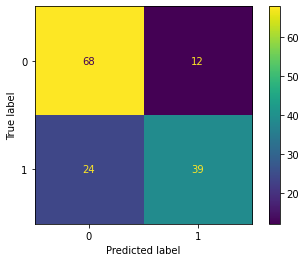

In [12]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

## Precision-recall scores

## Calculate the precision and recall scores for the test set. 

_hint: Use the methods from sklearn.metrics_ 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [13]:
precision_score(y_test, y_pred)

0.7647058823529411

In [14]:
recall_score(y_test, y_pred)

0.6190476190476191

### Questions:

- What do these precision and recall scores mean? Explain precision and recall with your own words.
- Are these the precision and recall scores for which threshold? Explain what a threshold mean with your own words.

Precision: From everybody I've predicted to die, how many of them actually died?

Recall: From everybody who died, how many I've predicted to die?

tresh = 0.5

## Compare a measure of accuracy, recall and precision for both train and test sets. 

You've calculated the metrics for the test dataset. Now, calculate the metrics for the train dataset and compare the results. What do you observe? Based on what you see, do you think your model has overfitted? 

In [15]:
precision_score(y_train, model.predict(X_train))

0.75

In [16]:
recall_score(y_train, model.predict(X_train))

0.6933333333333334

I don't think the model was overfitted

# Non-linear Models - Trees

## Create a decision tree model using the default arguments.

In [17]:
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Calculate the accuracy, precision and recall scores for both the `training set` and the `test set`.

After calculating it, compare the results. What do you observe? Do you understand what does that mean?

In [19]:
model.score(X_train, y_train)

0.8400702987697716

In [20]:
model.score(X_test, y_test)

0.6573426573426573

In [21]:
precision_score(y_train, model.predict(X_train))

0.8681318681318682

In [22]:
precision_score(y_test, model.predict(X_test))

0.6521739130434783

In [23]:
recall_score(y_train, model.predict(X_train))

0.7022222222222222

In [24]:
recall_score(y_test, model.predict(X_test))

0.47619047619047616

## Plotting trees

Use the the method `plot_tree()` from `sklearn.tree` module to print the tree on your notebook. Play with arguments like `feature_names`, `class_names`, `proportion`, `filled`...

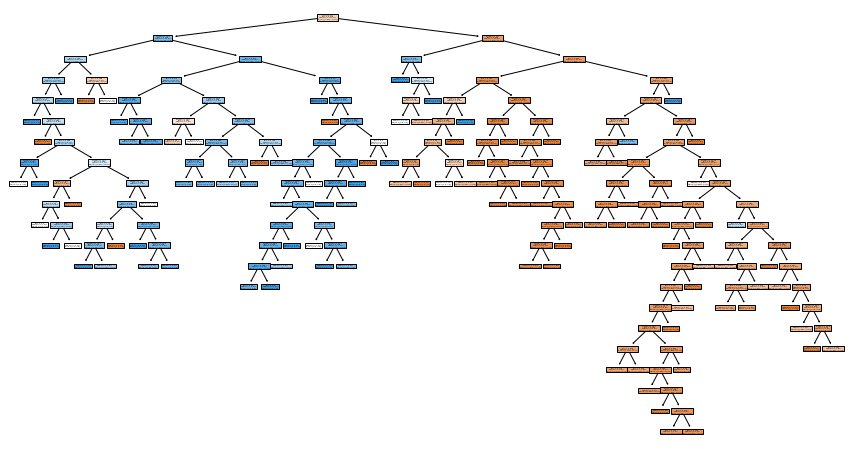

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
plot_tree(model, feature_names=titanic_test.columns, filled=True, proportion=True, ax=ax);

What do you think happened? Did you expect the resulting tree to have that size?

It didn't generalize enough

## Using the `mlxtend.plotting` module, plot the decision boundaries for the Tree classification algorithm.

Use `!pip install mlxtend --user` to install the `mlxtend` package


_hint: you have to convert the dataframes to np.array before plotting in this package_

Note: Include the labels on the plot using: 

`plt.xlabel(x_test.columns[0])`

`plt.ylabel(x_test.columns[1]);`

where x_test is your dataframe.

C:\Users\julia\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


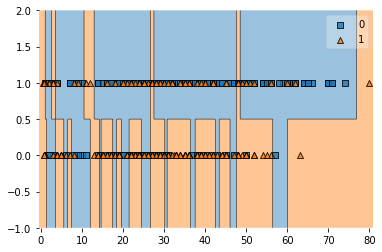

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X_train), np.array(y_train), model)

## Perform the same operation (i.e., use the `mlxtend.plotting` module to plot the decision boundary) for the Logistic Regression model you've created above.

C:\Users\julia\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


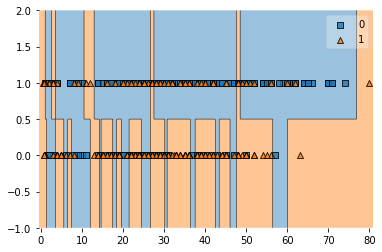

In [31]:
plot_decision_regions(np.array(X_train), np.array(y_train), model)

# Fixing the Decision Tree algorithm

As you observed, an overfit occurred when using the default values of the DecisionTreeClassifier. This happens because, by default, the Decision Tree is so complex that it manages to memorize the whole dataset despite the granularity necessary to do that. It just keeps creating splits until each observation is memorized. 

In this sense, by default, the Decision Tree algorithm is **too complex**. We will solve this problem by making the tree a bit less complex. We'll change the parameter called `max_depth` for the DecisionTreeClassifier().

Try to find a good value for `max_depth` that helps getting closer results within `train` and `test` scores.

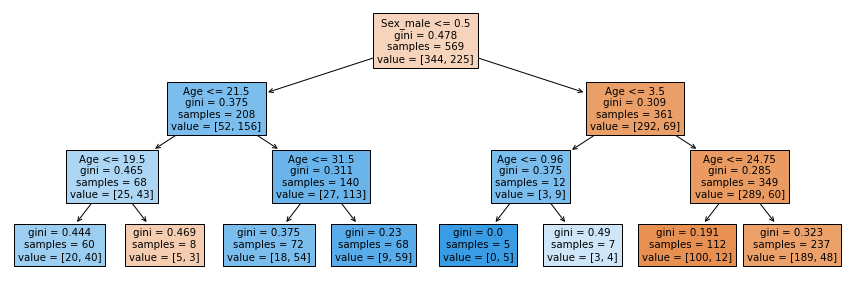

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
plot_tree(tree, ax=ax, feature_names=X_test.columns, filled=True);

## Plot the resulting tree and deicision boundary. 

After choosing a good value for `max_depth`, i.e., a value that manages to get a good balance within performance and generalization

C:\Users\julia\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


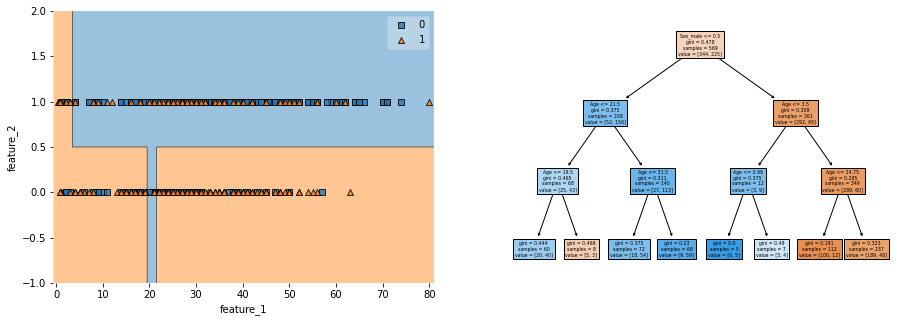

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_decision_regions(np.array(X_train), np.array(y_train), tree, ax=ax[0])
ax[0].set_xlabel('feature_1')
ax[0].set_ylabel('feature_2')

plot_tree(tree, ax=ax[1], feature_names=X_train.columns, filled=True);